In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Train.csv')

In [4]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
df.shape

(1600, 6)

In [6]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [7]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [11]:
df=df.to_numpy()

In [14]:
type(df)

numpy.ndarray

In [15]:
x=df[:,:5]
y=df[:,5]

In [16]:
x

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [17]:
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [18]:
type(x)

numpy.ndarray

In [19]:
type(y)

numpy.ndarray

In [20]:
#Normalisation
u=np.mean(x,axis=0)
std=np.std(x,axis=0)

x=(x-u)/std


In [21]:
print(x)

[[ 0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [-0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [-1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [-1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]


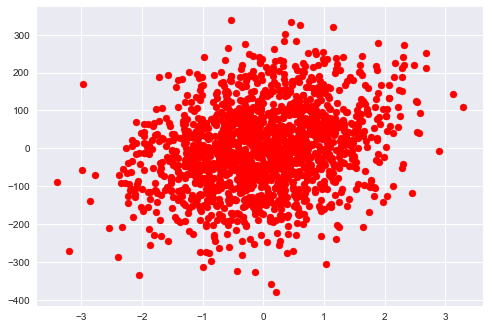

In [24]:
plt.style.use('seaborn')
plt.scatter(x[:,0],y,color='red')
plt.show()

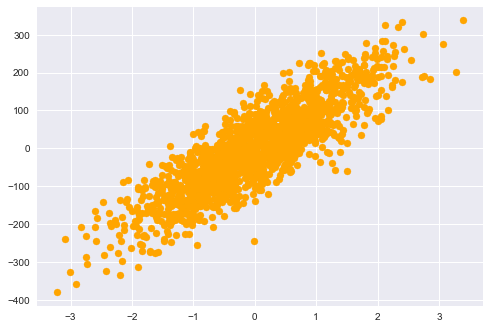

In [25]:
plt.style.use('seaborn')
plt.scatter(x[:,1],y,color='orange')
plt.show()

In [26]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e=0.0
    m=X.shape[0]
    y_=hypothesis(X,theta)
    e=np.sum((y-y_)**2)
    
    return e/m

def gradient(X,y,theta):
    m=X.shape[0]
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    
    return grad/m
    
def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        #Gradient Descent
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list
    

In [27]:
theta,error_list=gradient_descent(x,y)

In [28]:
print(theta)

[29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


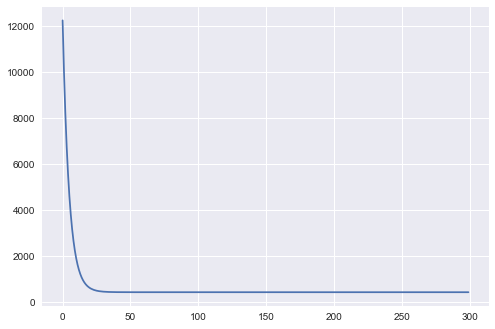

In [30]:
#print(error_list)
plt.plot(error_list)
plt.show()

In [32]:
#Predictions
y_=hypothesis(x,theta)
print(y_)

[ -58.19079849  -89.77903095   53.63422403 ... -115.97686079  -64.59533226
 -116.43326433]


In [33]:
y.shape

(1600,)

In [34]:
x.shape

(1600, 5)

In [35]:
y_.shape

(1600,)

In [37]:
def r2_score(Y,Y_):
    #Instead of a loop,use np.sum bcz it is faster
    num=np.sum((Y-Y_)**2)
    den=np.sum((Y-Y.mean())**2)
    score=1-(num/den)
    return score*100

In [38]:
r2_score(y,y_)

96.60856726304088

In [39]:
type(y_)

numpy.ndarray

In [40]:
print(y_)

[ -58.19079849  -89.77903095   53.63422403 ... -115.97686079  -64.59533226
 -116.43326433]


In [41]:
X_test=pd.read_csv('Test.csv')

In [42]:
X_test

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [44]:
X_test=X_test.to_numpy()
type(X_test)

numpy.ndarray

In [48]:
print(X_test)


[[ 1.01525387e+00  2.07620944e+00 -2.66434820e-01 -2.41808820e+00
  -9.80502790e-01]
 [-3.75021204e-01  9.53184528e-01  6.26719138e-01  7.04405750e-01
  -3.55489211e-01]
 [-1.02445225e+00  9.62991107e-01 -4.07942004e-01 -1.86127383e+00
   4.55201351e-01]
 ...
 [ 5.54727647e-01  1.76824345e+00 -8.97787210e-01 -1.19366107e+00
   3.40563374e-01]
 [-1.62717246e+00  8.56470994e-01 -5.65729519e-04  6.29386649e-01
   4.53382144e-01]
 [ 1.39310499e-01  5.31597186e-01 -8.53107053e-01  3.16920076e-02
   1.71489304e+00]]


In [58]:
#Normalisation
u=np.mean(X_test,axis=0)
std=np.std(X_test,axis=0)

X_test=(X_test-u)/std

print(X_test)
print(theta)

[[ 1.06045325  2.04744832 -0.24549091 -2.30661408 -1.08034112]
 [-0.36118497  0.94676928  0.61285352  0.71550489 -0.41280281]
 [-1.02526649  0.95638073 -0.38148304 -1.76769893  0.45304559]
 ...
 [ 0.58953804  1.74561022 -0.85223715 -1.1215471   0.33060786]
 [-1.64158344  0.85198015  0.01001627  0.64289734  0.4511026 ]
 [ 0.16474952  0.53357066 -0.80929835  0.06441606  1.79844429]]
[29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


In [61]:
X_test.shape 

(400, 5)

In [62]:
theta.shape

(5,)

In [59]:
#Predictions for test data
Y_test=hypothesis(X_test,theta)

In [63]:
Y_test.shape

(400,)

In [64]:
type(Y_test)

numpy.ndarray

In [66]:
#print(Y_test)

In [139]:
Id=np.arange(400)
#print(Id)

In [140]:
df=pd.DataFrame(data=Y_test,columns=['target'])


In [141]:
df.head()

,target
0,115.452194
1,115.611069
2,-22.368764
3,-46.780611
4,-97.705497


In [143]:
df.index.name='Id'

In [146]:
df.to_csv('Result.csv')

In [147]:
df.head()

,target
Id,
0,115.452194
1,115.611069
2,-22.368764
3,-46.780611
4,-97.705497
